# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [ ]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## Data Overview

- Observations
- Sanity checks

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
learn_dat = pd.read_csv("/content/drive/MyDrive/Project2_ExtraaLearn.csv") #read the data file
# copying data to another variable to avoid any changes to original data
data = learn_dat.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

In [ ]:
# View the first 5 rows of the dataset
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


In [ ]:
# View the last 5 rows of the dataset
data.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.17000,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.39300,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.69200,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.87900,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.07500,Phone Activity,No,No,No,No,No,0


We can see the main variables and the categories of the categorical variables.

In [ ]:
# Understand the shape of the data
data.shape

(4612, 15)

The data has 15 variables and 4,612 observation

In [ ]:
# Checking the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

Thats great! no missing values in the dataset. There are 5 numerical and 9 categorical variables in the dataset.

In [ ]:
# Checking the descriptive statistics of the columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.00000,46.20121,13.16145,18.00000,36.00000,51.00000,57.00000,63.00000
website_visits,4612.00000,3.56678,2.82913,0.00000,2.00000,3.00000,5.00000,30.00000
time_spent_on_website,4612.00000,724.01127,743.82868,0.00000,148.75000,376.00000,1336.75000,2537.00000
page_views_per_visit,4612.00000,3.02613,1.96812,0.00000,2.07775,2.79200,3.75625,18.43400
status,4612.00000,0.29857,0.45768,0.00000,0.00000,0.00000,1.00000,1.00000


Numerical variables dont seem to have a lot of skewness as the 50% and mean do not differ much except for the time_spent_on_website variable.

In [ ]:
# Checking for duplicate values in the data
data.duplicated().sum()

0

No duplicates in the dataset

In [ ]:
# List of all important categorical variables
cat_col = ["current_occupation", "first_interaction", 'profile_completed', 'last_activity', 'print_media_type1', 'print_media_type2', 'digital_media', "educational_channels", "referral",'status']

# Printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(data[column].value_counts(1))
    print("-" * 50)

current_occupation
Professional   0.56722
Unemployed     0.31245
Student        0.12034
Name: proportion, dtype: float64
--------------------------------------------------
first_interaction
Website      0.55117
Mobile App   0.44883
Name: proportion, dtype: float64
--------------------------------------------------
profile_completed
High     0.49089
Medium   0.48591
Low      0.02320
Name: proportion, dtype: float64
--------------------------------------------------
last_activity
Email Activity     0.49393
Phone Activity     0.26756
Website Activity   0.23851
Name: proportion, dtype: float64
--------------------------------------------------
print_media_type1
No    0.89224
Yes   0.10776
Name: proportion, dtype: float64
--------------------------------------------------
print_media_type2
No    0.94948
Yes   0.05052
Name: proportion, dtype: float64
--------------------------------------------------
digital_media
No    0.88573
Yes   0.11427
Name: proportion, dtype: float64
-----------------

In [ ]:
# Dropping ID from the data as it is an identifier and will not add value to the analysis
data=data.drop(columns=["ID"])

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

## EDA

**bold text**Univariate analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

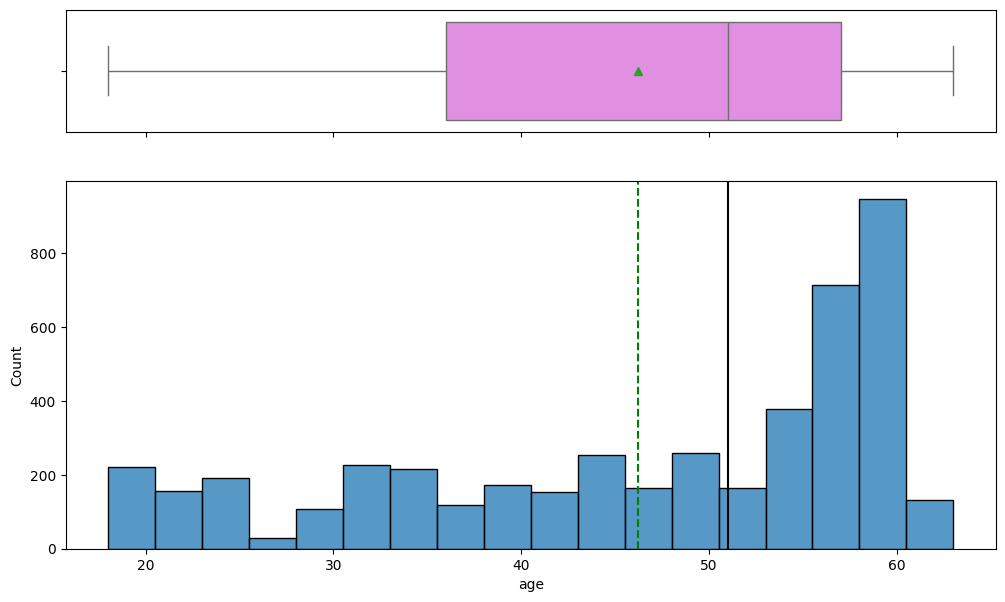

In [ ]:
histogram_boxplot(data, "age")

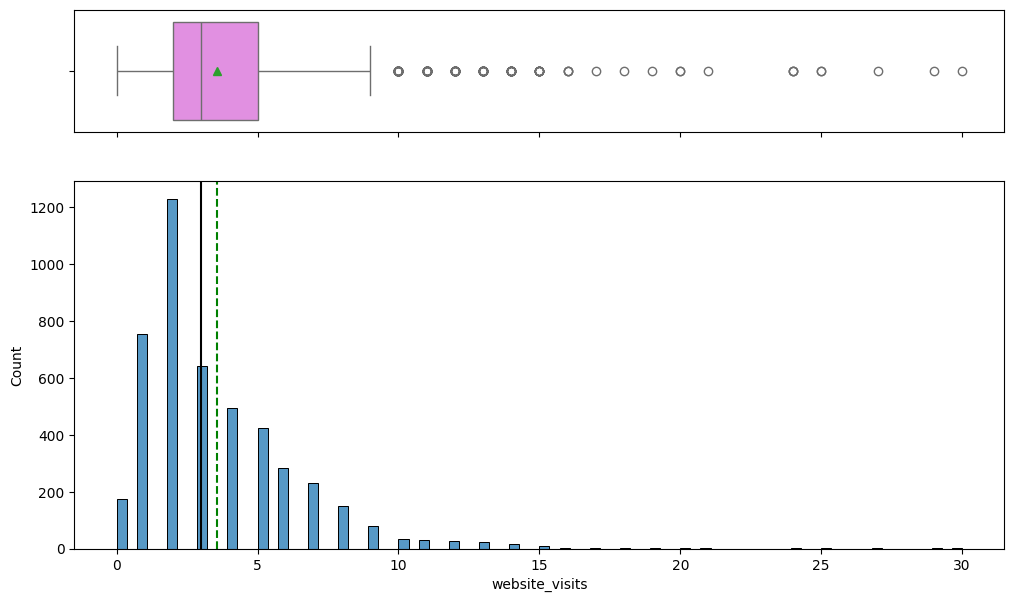

In [ ]:
histogram_boxplot(data, "website_visits")

In [ ]:
# To check how many leads have not visited web-site
no_web_visits=data[data["website_visits"] == 0]

In [ ]:
no_web_visits.shape

(174, 14)

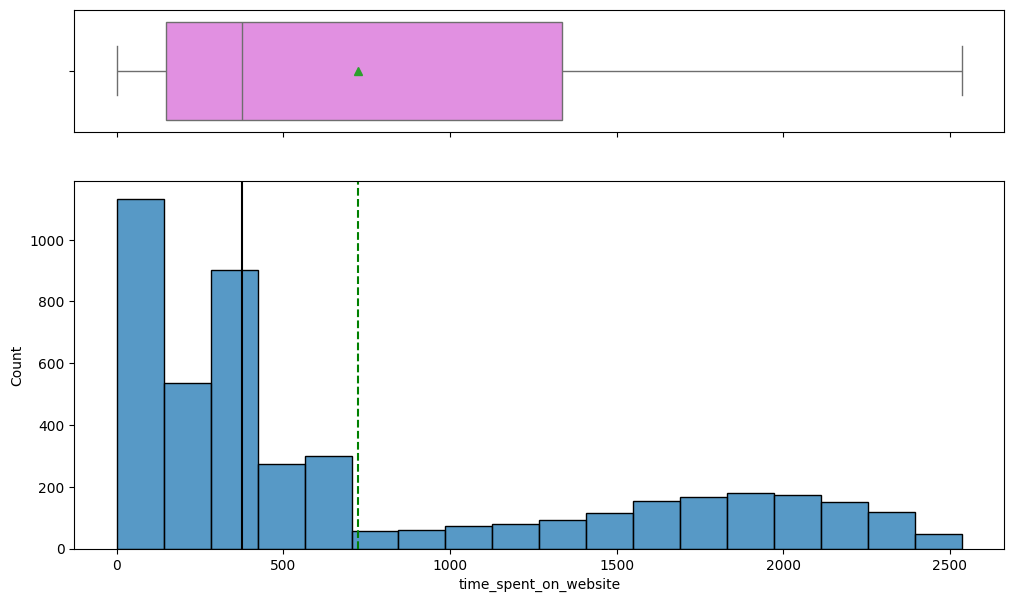

In [ ]:
histogram_boxplot(data,'time_spent_on_website')

This variable is right-skewed.
A right-skewed distribution indicates that most customers spent less time on website while only a few customers (on the right tail) spent much more time on website.

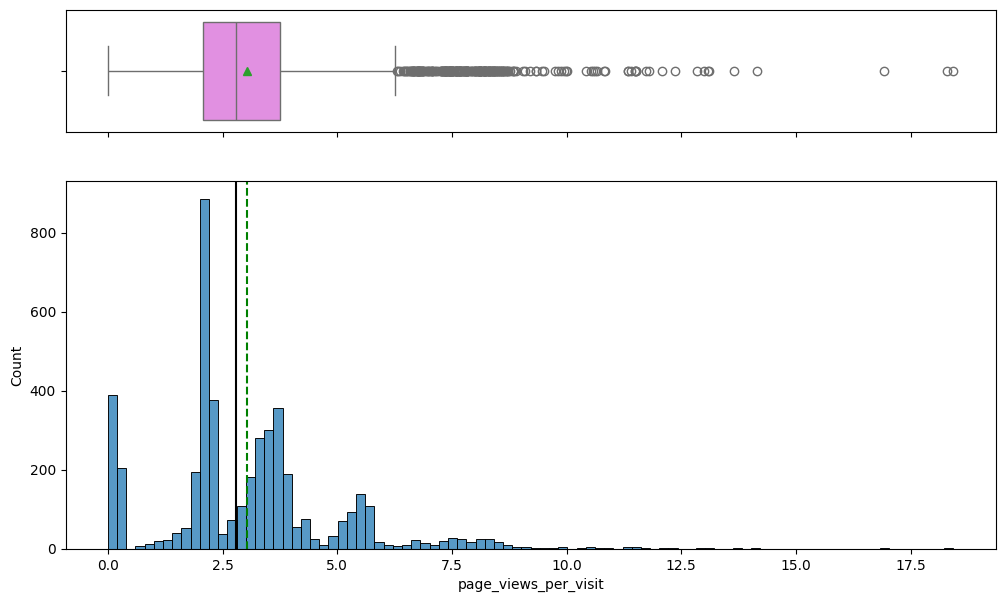

In [ ]:
histogram_boxplot(data,'page_views_per_visit')

The distribution of this variable is right-skewed as well.

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

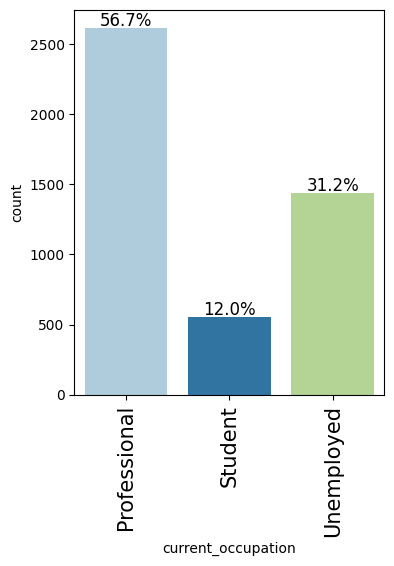

In [ ]:
labeled_barplot(data, "current_occupation", perc=True)

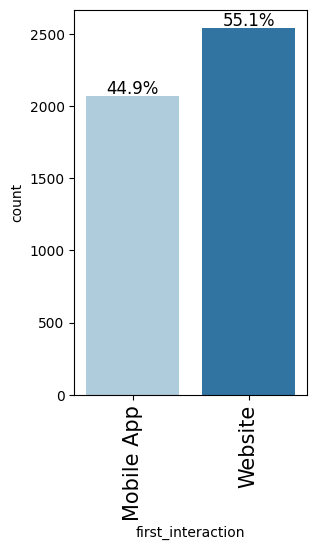

In [ ]:
labeled_barplot(data, "first_interaction", perc=True)

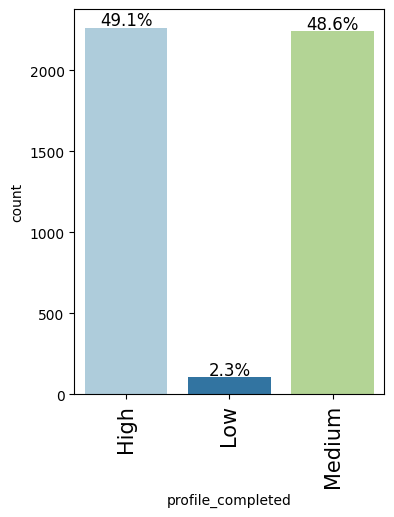

In [ ]:
labeled_barplot(data, "profile_completed", perc=True)

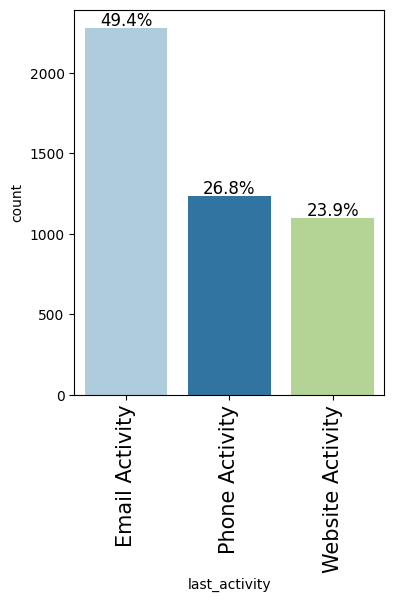

In [ ]:
labeled_barplot(data, "last_activity", perc=True)

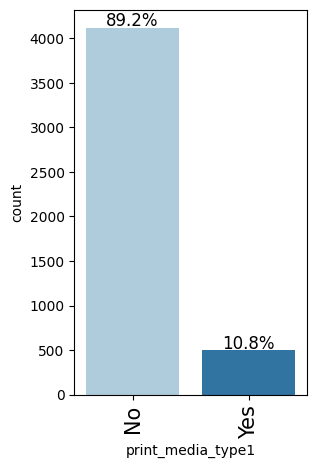

In [ ]:
labeled_barplot(data, 'print_media_type1', perc=True)

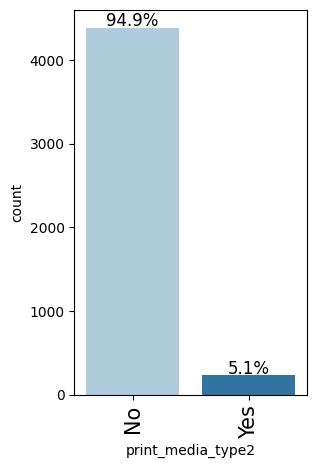

In [ ]:
labeled_barplot(data, 'print_media_type2', perc=True)

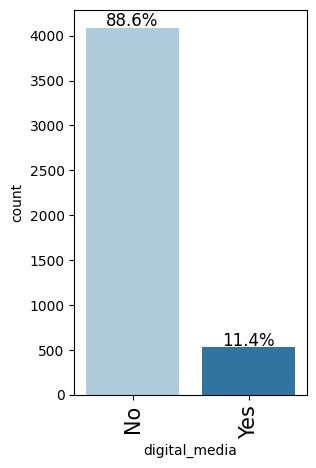

In [ ]:
labeled_barplot(data, 'digital_media', perc=True)

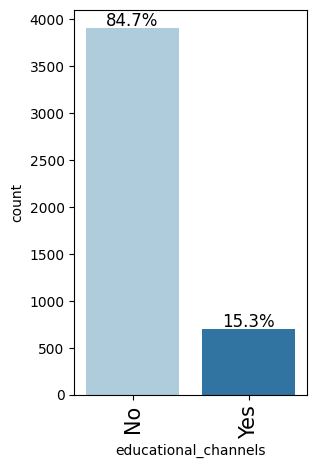

In [ ]:
labeled_barplot(data, "educational_channels", perc=True)

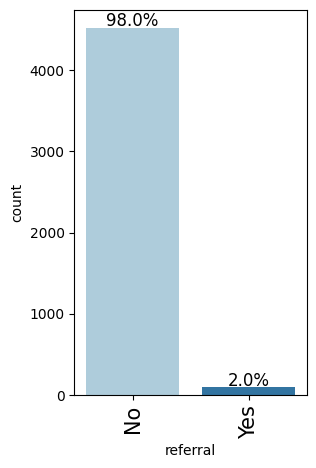

In [ ]:
labeled_barplot(data, "referral", perc=True)

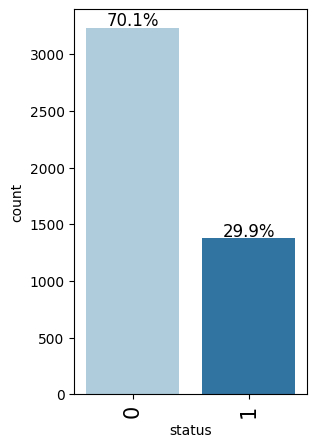

In [ ]:
labeled_barplot(data, 'status', perc=True)

Bi-Variate Analysis

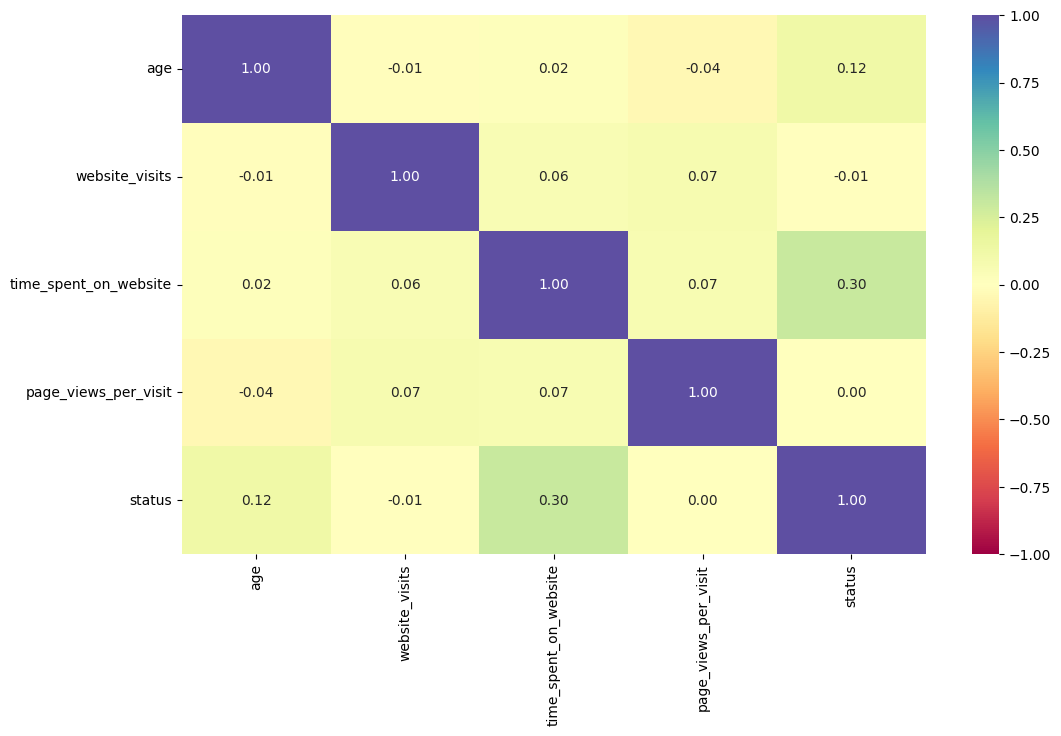

In [ ]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Observations:

The heatmap shows that there is some correlation between the status and time spent on the website, and some weak corelation with age.


In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555
------------------------------------------------------------------------------------------------------------------------


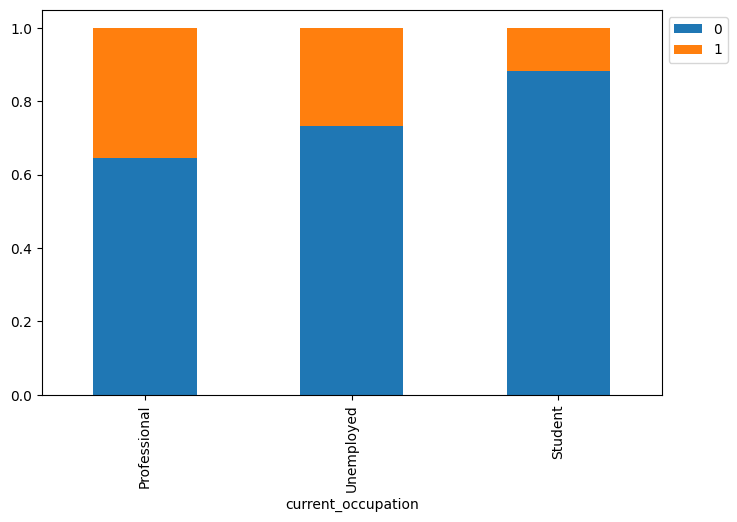

In [ ]:
stacked_barplot(data, "current_occupation", "status")

Current occupation may play some role for subjects to take the program, specifically, unemployed and professionals show a higher rate of enrollment than students. The highest rate of conversion is among unemployed.

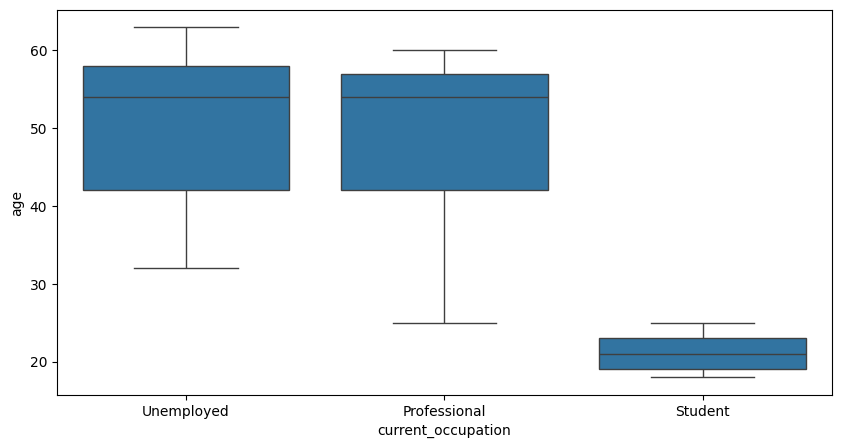

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = data, x = data["current_occupation"], y = data["age"])
plt.show()

age shows a differentiaion between such leads

In [ ]:
data.groupby(["current_occupation"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.00000,49.34748,9.89074,25.00000,42.00000,54.00000,57.00000,60.00000
Student,555.00000,21.14414,2.00111,18.00000,19.00000,21.00000,23.00000,25.00000
Unemployed,1441.00000,50.14018,9.99950,32.00000,42.00000,54.00000,58.00000,63.00000


status                0     1   All
first_interaction                  
All                3235  1377  4612
Website            1383  1159  2542
Mobile App         1852   218  2070
------------------------------------------------------------------------------------------------------------------------


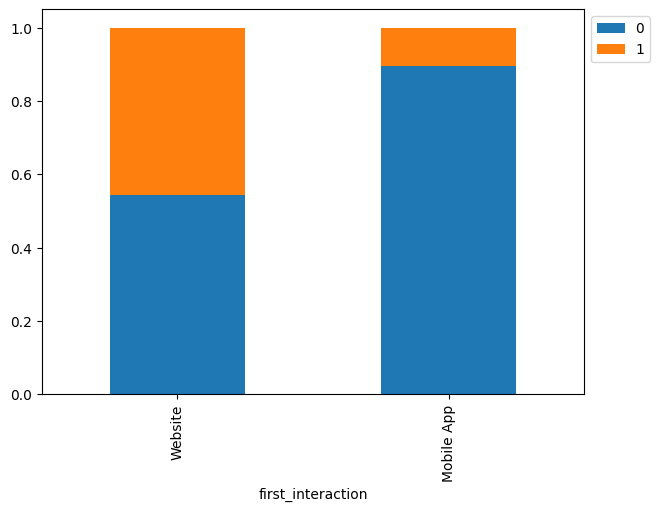

In [ ]:
stacked_barplot(data, "first_interaction", "status")

First interaction via website shows a higher conversion to enrollment.

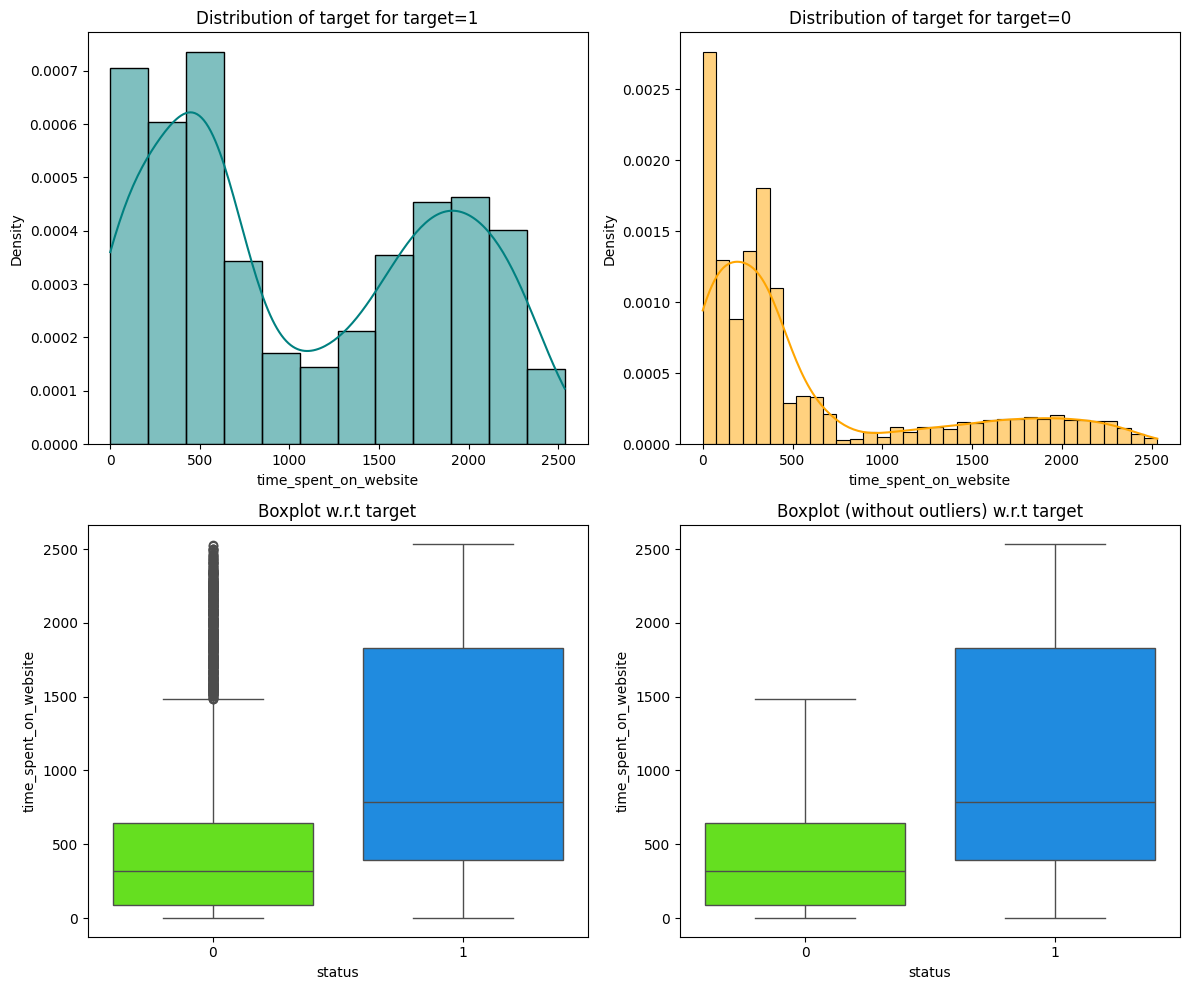

In [ ]:
distribution_plot_wrt_target(data, "time_spent_on_website", "status")

In [ ]:
# checking the median value
data.groupby(["status"])["time_spent_on_website"].median()

,time_spent_on_website
status,
0,317.00000
1,789.00000


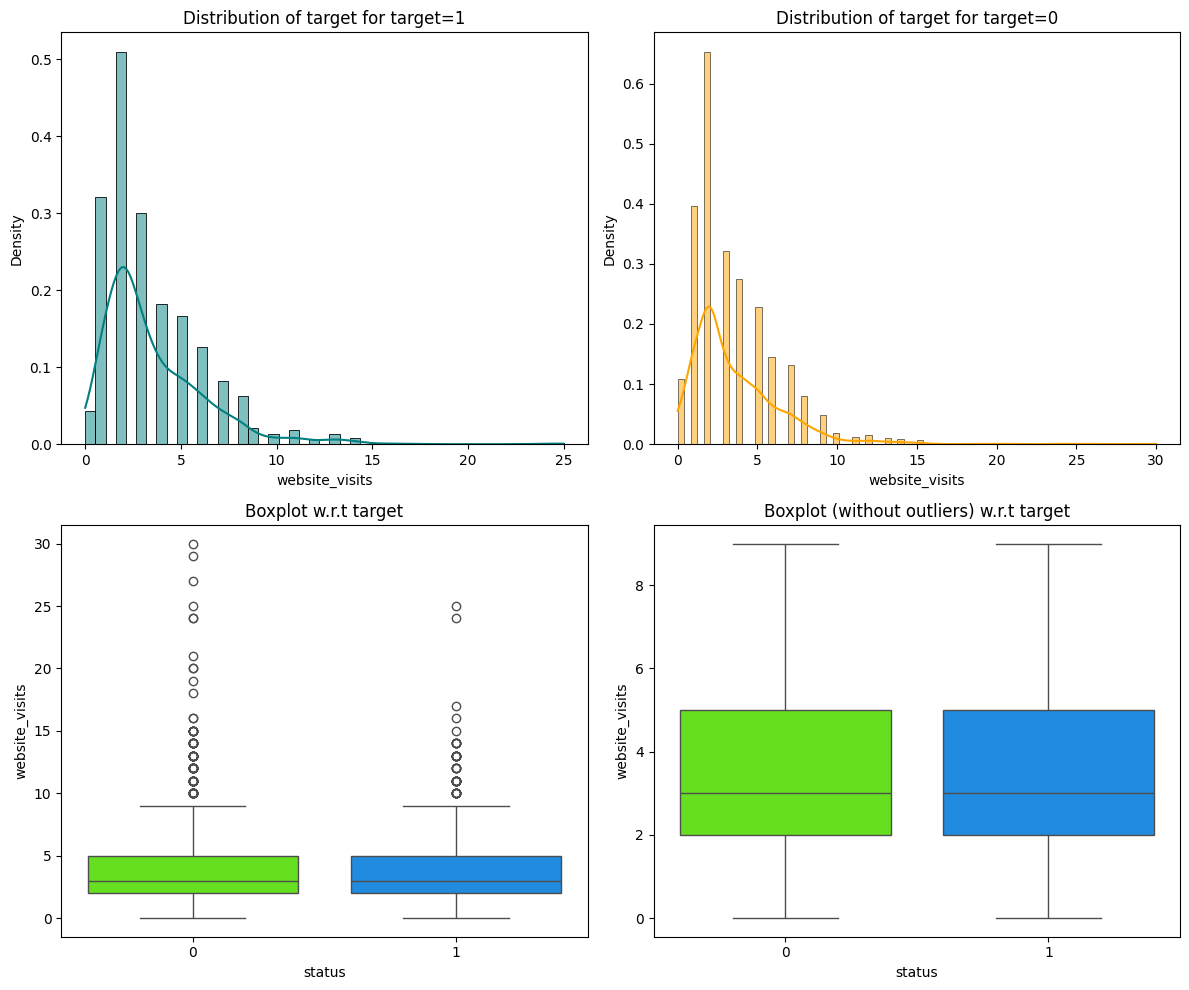

In [ ]:
distribution_plot_wrt_target(data, "website_visits", "status")

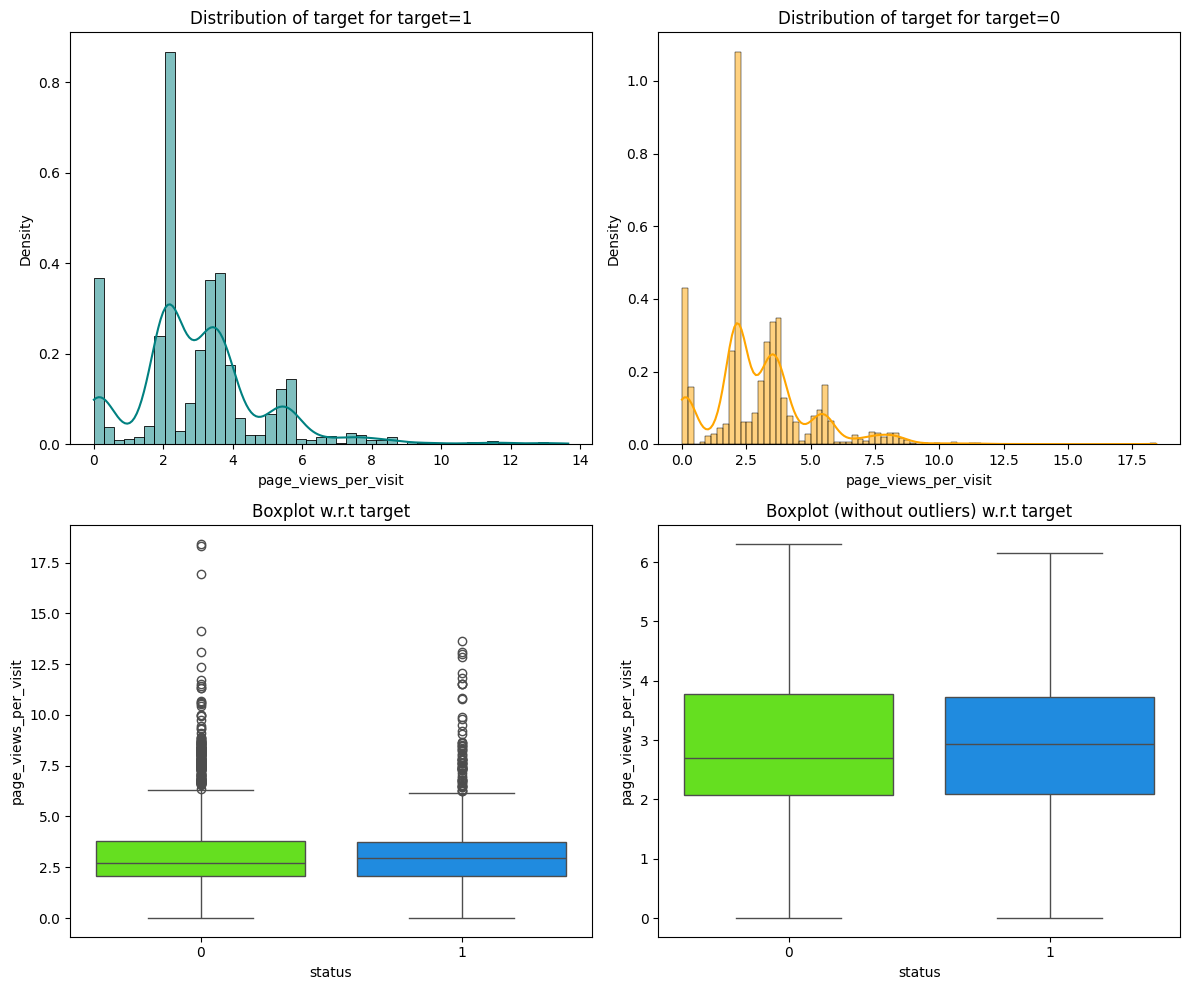

In [ ]:
distribution_plot_wrt_target(data, "page_views_per_visit", "status")

status                0     1   All
profile_completed                  
All                3235  1377  4612
High               1318   946  2264
Medium             1818   423  2241
Low                  99     8   107
------------------------------------------------------------------------------------------------------------------------


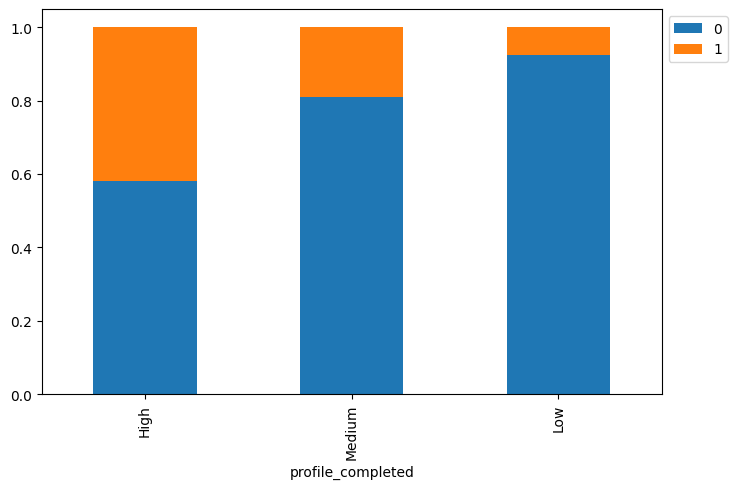

In [ ]:
stacked_barplot(data, "profile_completed", "status")

High level of completion of the profile indicates a higher level of conversion.

status               0     1   All
last_activity                     
All               3235  1377  4612
Email Activity    1587   691  2278
Website Activity   677   423  1100
Phone Activity     971   263  1234
------------------------------------------------------------------------------------------------------------------------


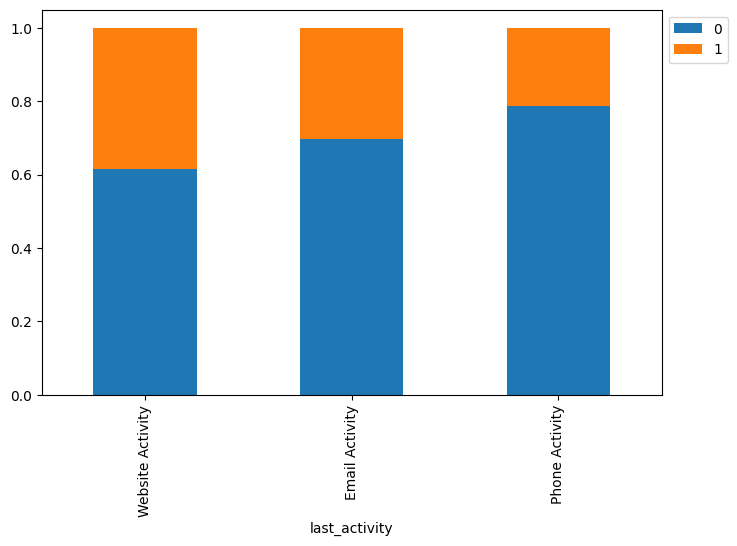

In [ ]:
stacked_barplot(data, "last_activity", "status")

Last activity via website seams to be associated with the higher enrollment level.

status                0     1   All
print_media_type1                  
All                3235  1377  4612
No                 2897  1218  4115
Yes                 338   159   497
------------------------------------------------------------------------------------------------------------------------


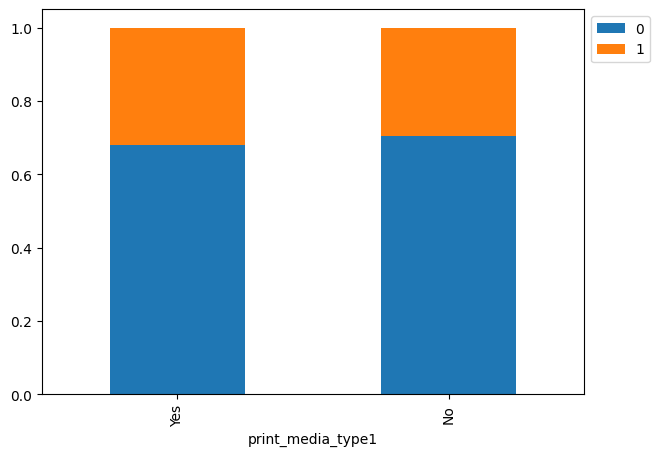

In [ ]:
stacked_barplot(data, "print_media_type1", "status")

status                0     1   All
print_media_type2                  
All                3235  1377  4612
No                 3077  1302  4379
Yes                 158    75   233
------------------------------------------------------------------------------------------------------------------------


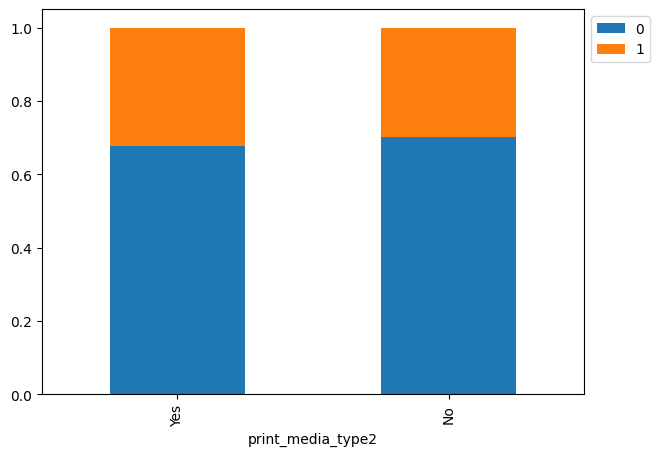

In [ ]:
stacked_barplot(data, "print_media_type2", "status")

status            0     1   All
digital_media                  
All            3235  1377  4612
No             2876  1209  4085
Yes             359   168   527
------------------------------------------------------------------------------------------------------------------------


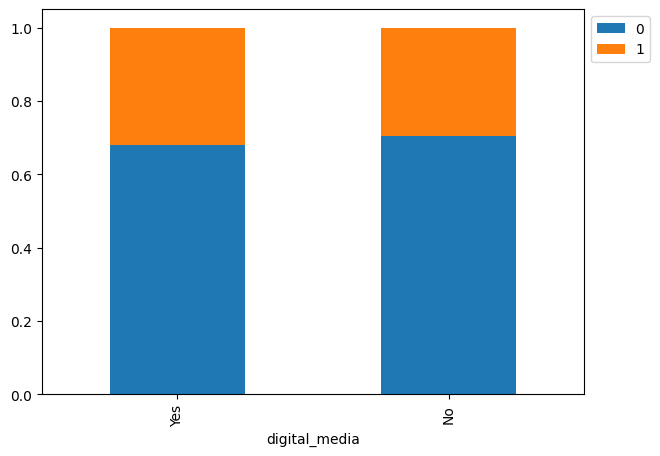

In [ ]:
stacked_barplot(data, "digital_media", "status")

status                   0     1   All
educational_channels                  
All                   3235  1377  4612
No                    2727  1180  3907
Yes                    508   197   705
------------------------------------------------------------------------------------------------------------------------


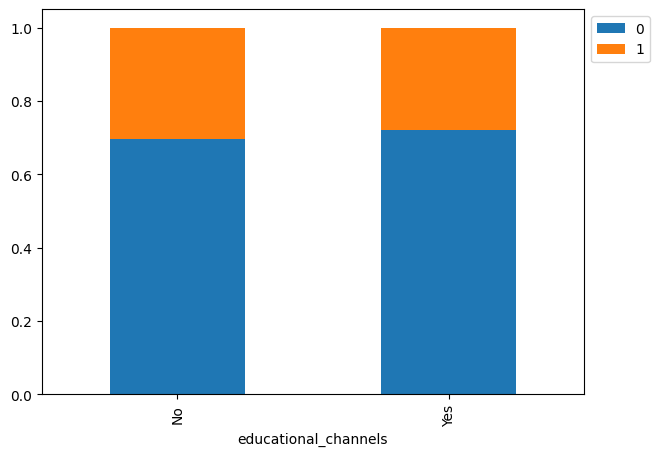

In [ ]:
stacked_barplot(data, "educational_channels", "status")

status       0     1   All
referral                  
All       3235  1377  4612
No        3205  1314  4519
Yes         30    63    93
------------------------------------------------------------------------------------------------------------------------


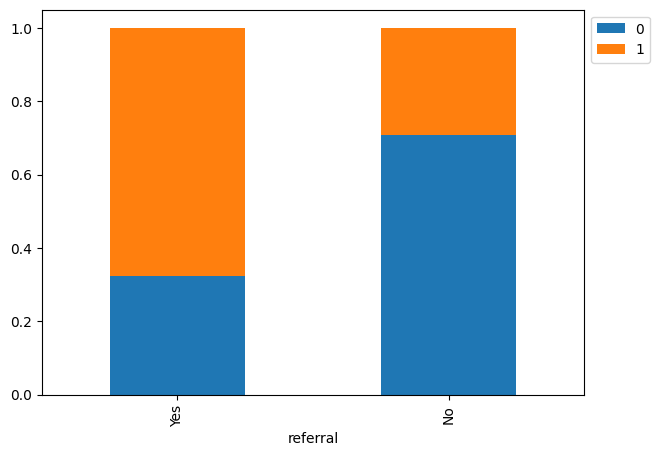

In [ ]:
stacked_barplot(data, "referral", "status")

Advertisement seems not to play much role in the decision-making of subjects to enroll in the program. Only referral shows a positive correlation with the enrolment.

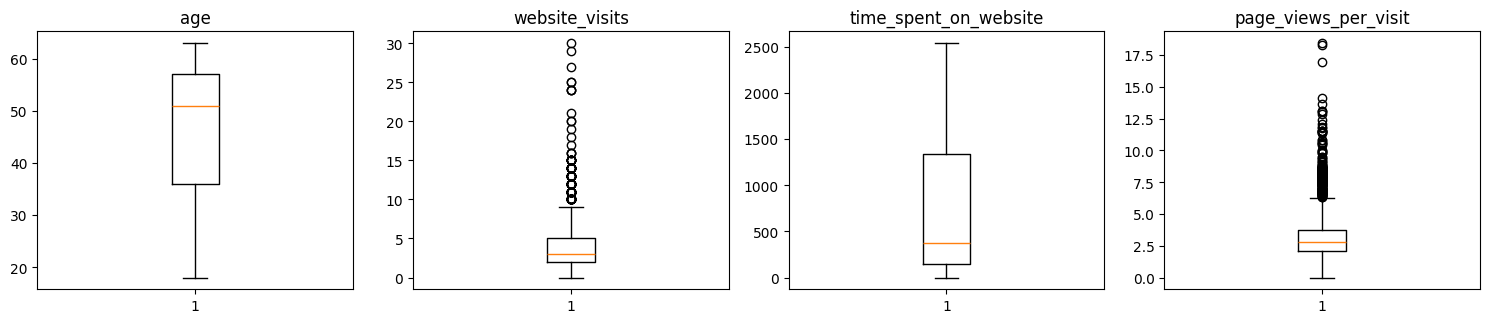

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping  target value
numeric_columns.remove("status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [ ]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate quartiles and IQR
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Find lower and upper bounds for outliers
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

(
    (data.select_dtypes(include=["float64", "int64"]) < lower)
    | (data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

,0
age,0.00000
website_visits,3.33912
time_spent_on_website,0.00000
page_views_per_visit,5.57242
status,0.00000


Page views per visit has almost 6% outliers, we will not remove these outliers as we would want our model to learn the underlying pattern for such customers.

## Building a Decision Tree model

In [ ]:
#Separating the outcome variable 'Status' from the rest of the dataset
X = data.drop(["status"], axis=1)
Y = data["status"] # dependent (target) variable

X = pd.get_dummies(X, drop_first=True) # get dummies for X

# Splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3228, 16)
Shape of test set :  (1384, 16)
Percentage of classes in training set:
status
0   0.70415
1   0.29585
Name: proportion, dtype: float64
Percentage of classes in test set:
status
0   0.69509
1   0.30491
Name: proportion, dtype: float64


In [ ]:
# Function to print the classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])

    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

In [ ]:
# Function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# Fitting the decision tree classifier on the training data
dt = DecisionTreeClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



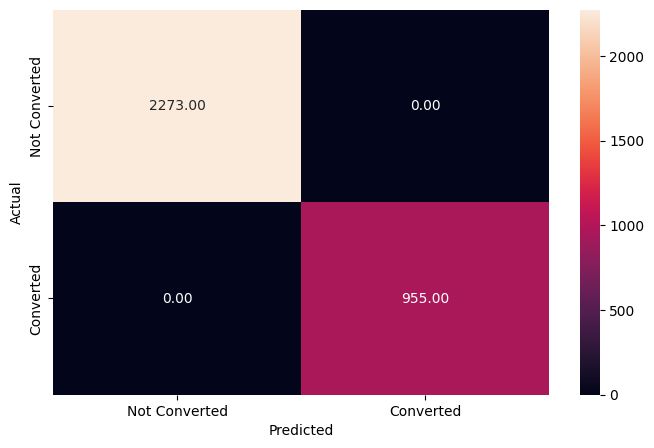

In [ ]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(X_train)
metrics_score(y_train, y_train_pred_dt)

Observation:

The Decision tree is giving a 100% score for all metrics on the training dataset.

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       962
           1       0.68      0.69      0.68       422

    accuracy                           0.80      1384
   macro avg       0.77      0.77      0.77      1384
weighted avg       0.81      0.80      0.80      1384



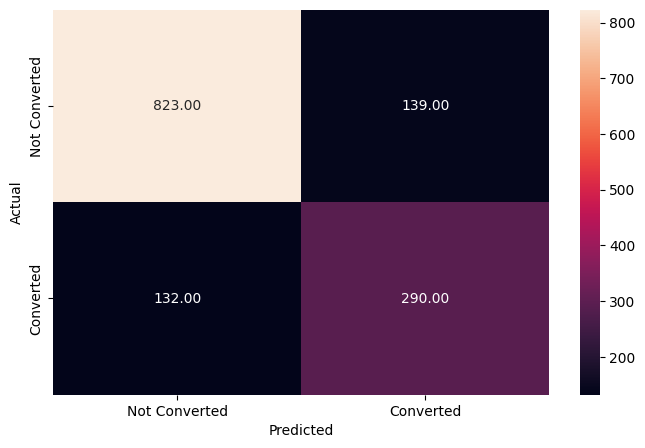

In [ ]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

The model is overfitting as the training data shows much better result than the testing data. We can tune the hyperparameters to increase the performance and reduce overfitting.

Checking the importance of the variables in this model.

                                   Imp
time_spent_on_website          0.26099
first_interaction_Website      0.18632
profile_completed_Medium       0.16422
page_views_per_visit           0.13114
age                            0.10255
website_visits                 0.04983
last_activity_Website Activity 0.02266
current_occupation_Unemployed  0.01533
last_activity_Phone Activity   0.01373
educational_channels_Yes       0.01308
profile_completed_Low          0.01242
current_occupation_Student     0.01187
digital_media_Yes              0.00765
print_media_type1_Yes          0.00445
print_media_type2_Yes          0.00203
referral_Yes                   0.00173


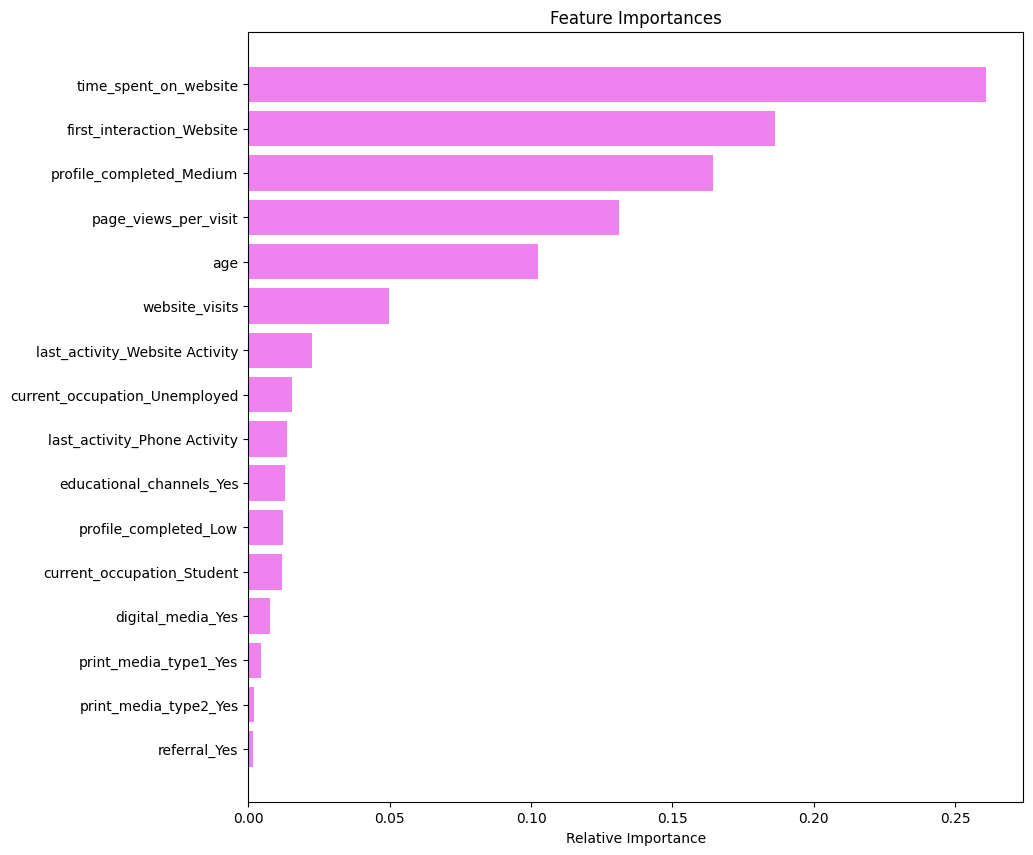

In [ ]:
# Importance of features in the tree building

print (pd.DataFrame(dt.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))
# Plotting the feature importance
importances = dt.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

So,time_spent_on_website is the most important feature followed by first_interaction_Website which makes sense.
Page views per visit and profile_completed_Medium are also important factor, however profile_completed_Medium in the bi-variant analysis was not showing the highest level of conversion.
                

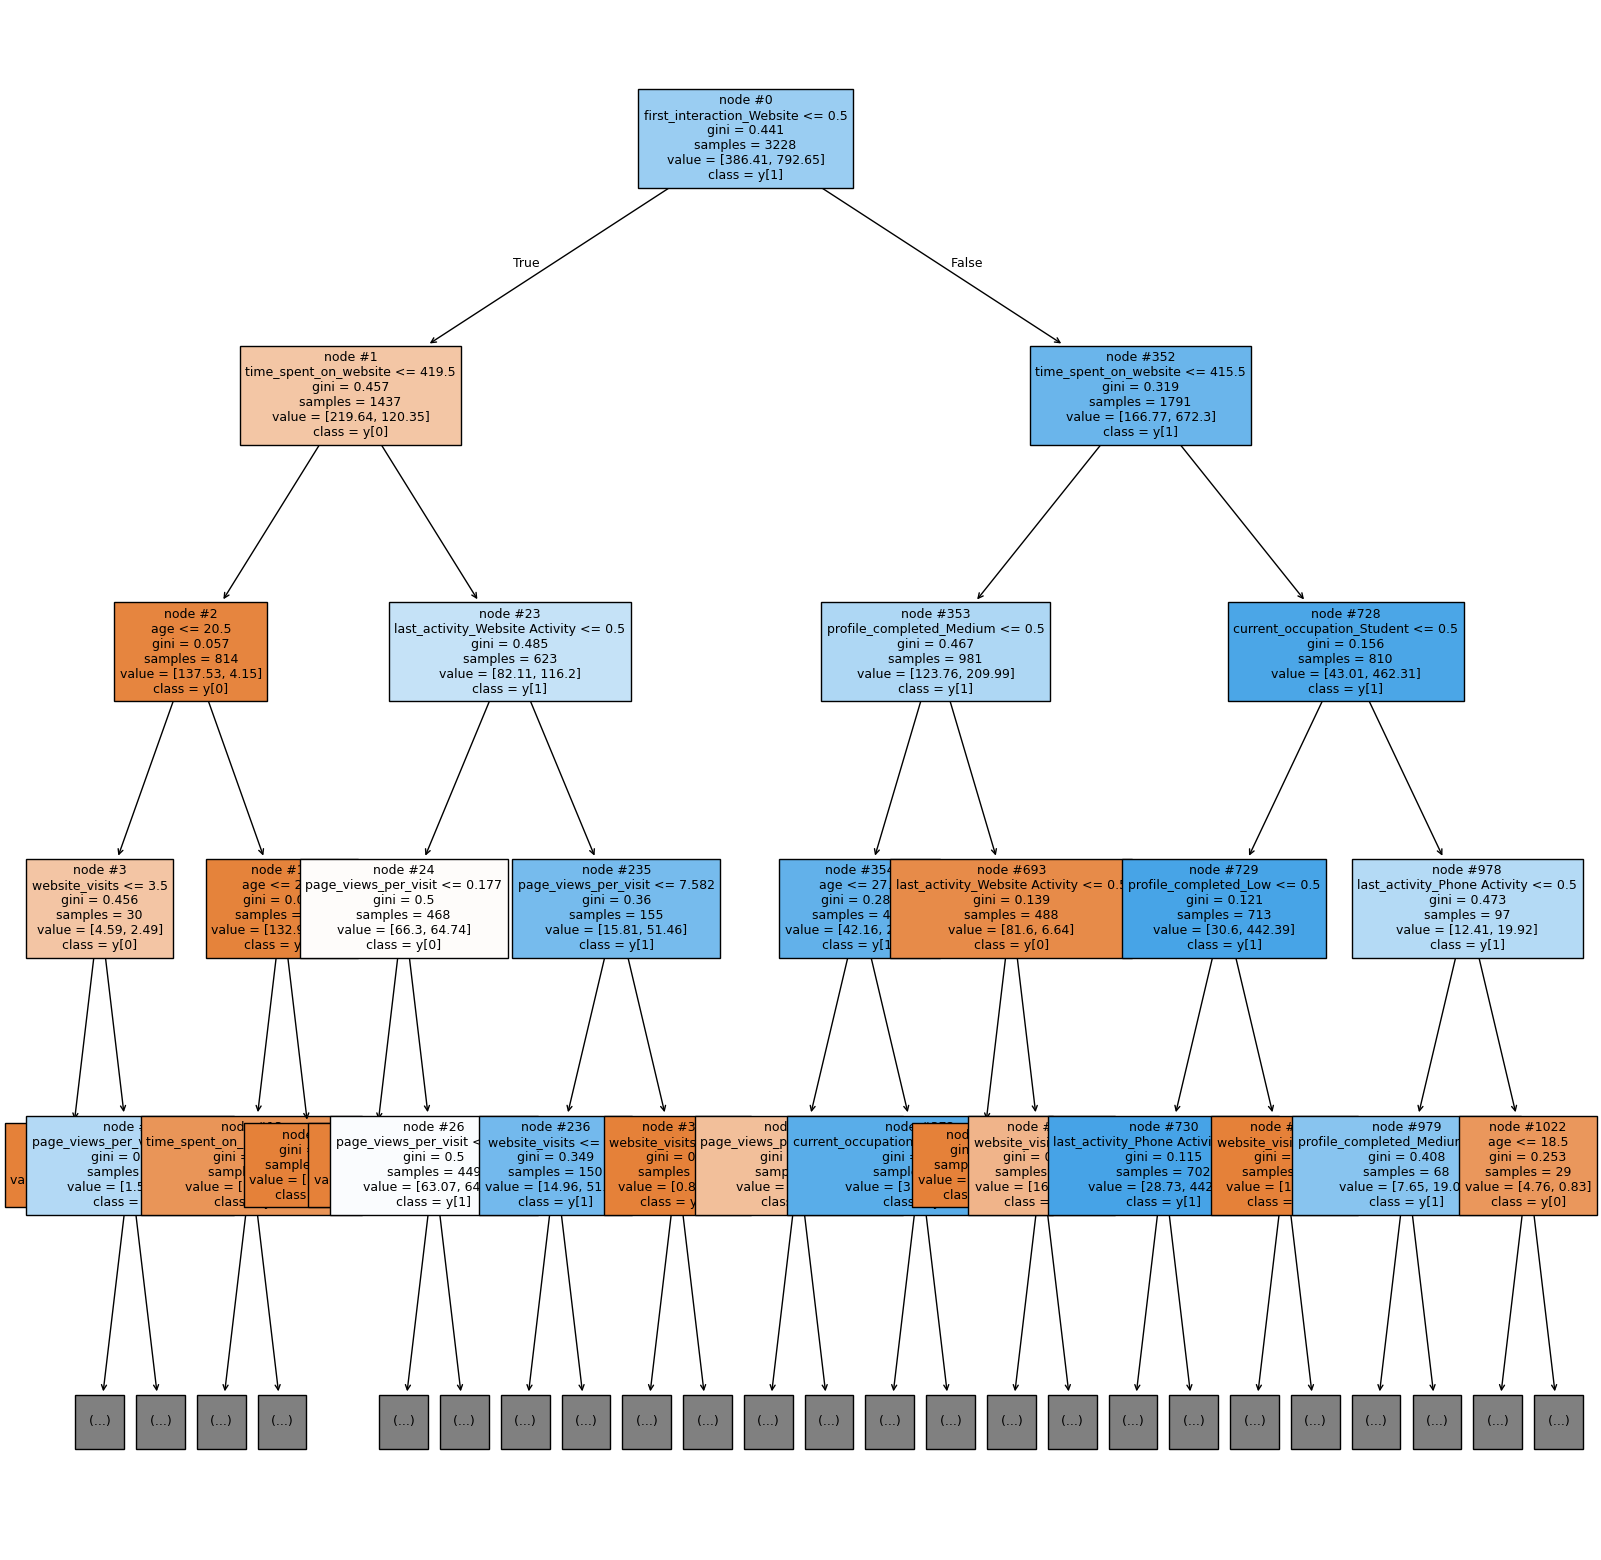

In [ ]:
features = list(X_train.columns)

plt.figure(figsize=(20,20))
from sklearn import tree
tree.plot_tree(dt,feature_names=features,max_depth =4, filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

## Building a Random Forest model

In [ ]:
# Fitting the Random Forest classifier on the training data
rf_model_estimator = RandomForestClassifier(random_state = 1)

rf_model_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



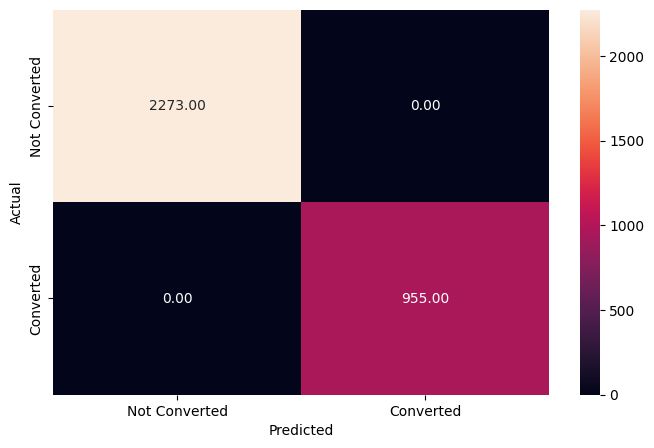

In [ ]:
# Checking performance on the training data
y_pred_train_rf = rf_model_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

For all the metrics in the training dataset, the Random Forest gives a 100% score.

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       962
           1       0.78      0.68      0.73       422

    accuracy                           0.84      1384
   macro avg       0.82      0.80      0.81      1384
weighted avg       0.84      0.84      0.84      1384



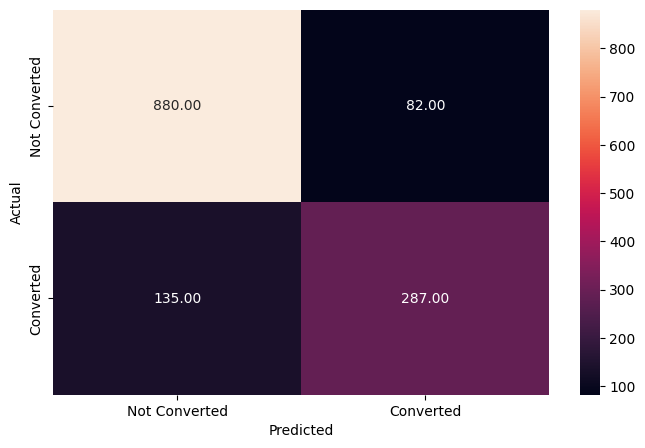

In [ ]:
# Checking performance on the testing data
y_pred_test_rf = rf_model_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

Random forest model slightly improved the performance from acuracy 0.8 to 0.84. In this model we are interested in the class 0 (actually not converted, but predicted as converted), and we are trying to decrease this number of the False Positives. If the model predics that the person will not convert , but the person actually converts, it doesn't present a significant financial loss for the company. However, if the model predicts that the person will enroll, however he/she doesn't - the programm will lose a customer, that is the situation that we are trying to avoid the most.

                                   Imp
time_spent_on_website          0.25995
first_interaction_Website      0.18015
page_views_per_visit           0.12201
age                            0.11432
profile_completed_Medium       0.09408
website_visits                 0.06326
last_activity_Phone Activity   0.03239
current_occupation_Unemployed  0.03121
last_activity_Website Activity 0.02017
current_occupation_Student     0.01805
profile_completed_Low          0.01455
digital_media_Yes              0.01252
print_media_type1_Yes          0.01136
educational_channels_Yes       0.01095
print_media_type2_Yes          0.00759
referral_Yes                   0.00744


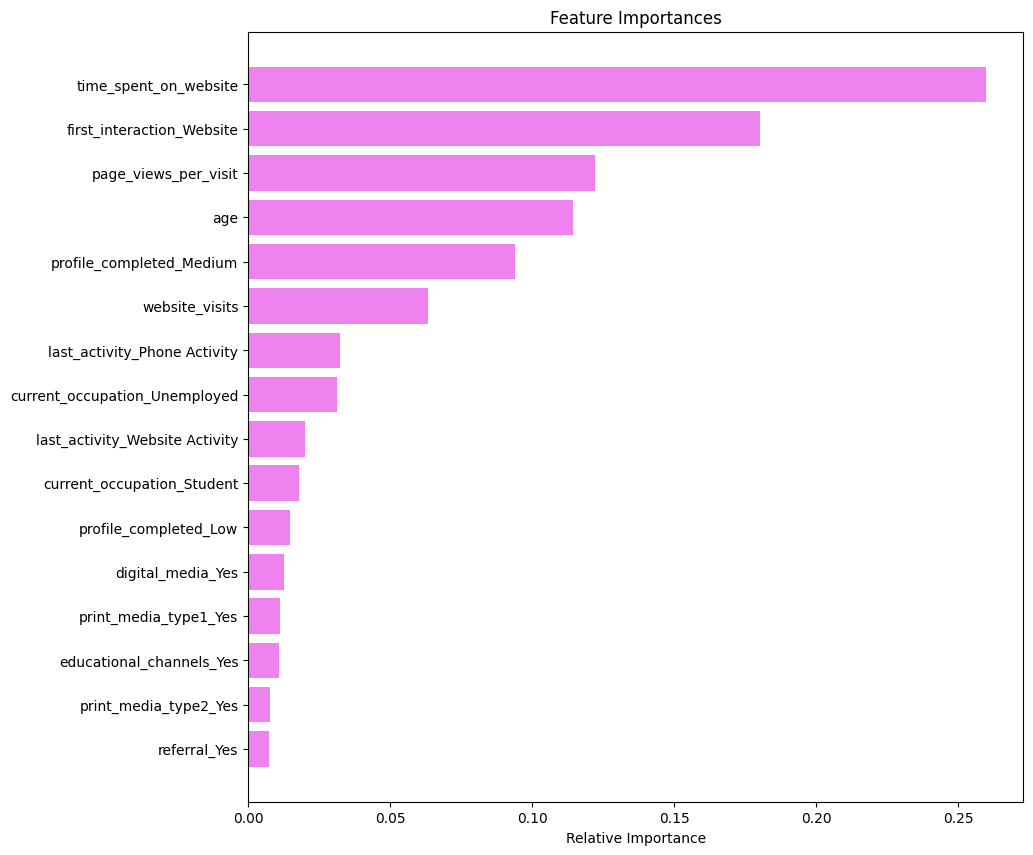

In [ ]:
# Importance of features in the tree building

print (pd.DataFrame(rf_model_estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))
# Plotting the feature importance
importances = rf_model_estimator.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

The importance of the features with RF model changed. Now, page_views_per_visit and age have a higher impact on the outcome than the Profile_completed_Medium.

## Do we need to prune the tree?

In [ ]:
# Tuning the Random Forest classifier
rf_tuned_estimator = RandomForestClassifier(max_depth=6, min_samples_split=10,random_state = 1)

rf_tuned_estimator.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_split=10, random_state=1)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2273
           1       0.83      0.69      0.75       955

    accuracy                           0.86      3228
   macro avg       0.85      0.81      0.83      3228
weighted avg       0.86      0.86      0.86      3228



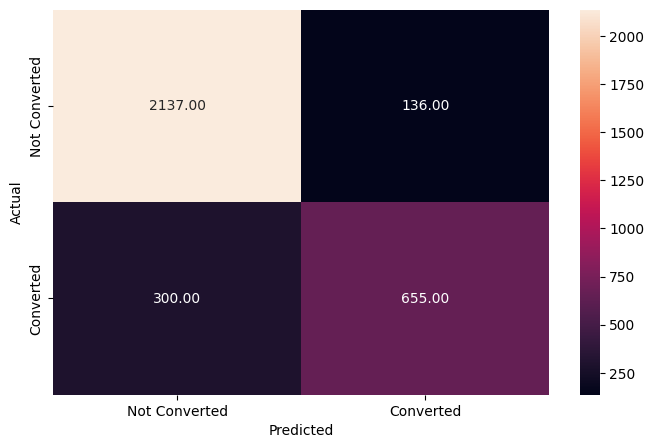

In [ ]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_tuned_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       962
           1       0.82      0.64      0.72       422

    accuracy                           0.85      1384
   macro avg       0.84      0.79      0.81      1384
weighted avg       0.84      0.85      0.84      1384



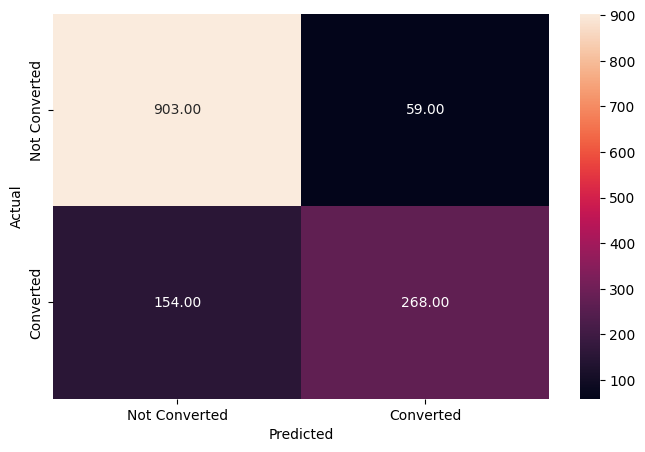

In [ ]:
# Checking performance on the testing data
y_pred_test_rf_tuned = rf_tuned_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf_tuned)

Pruned random forest seems to slightly improve recall for class 0.

                                   Imp
first_interaction_Website      0.32594
time_spent_on_website          0.30636
profile_completed_Medium       0.13661
age                            0.05448
last_activity_Phone Activity   0.03424
current_occupation_Student     0.03115
page_views_per_visit           0.02514
current_occupation_Unemployed  0.02245
last_activity_Website Activity 0.01725
profile_completed_Low          0.01352
website_visits                 0.01207
referral_Yes                   0.01193
print_media_type2_Yes          0.00282
digital_media_Yes              0.00220
print_media_type1_Yes          0.00202
educational_channels_Yes       0.00182


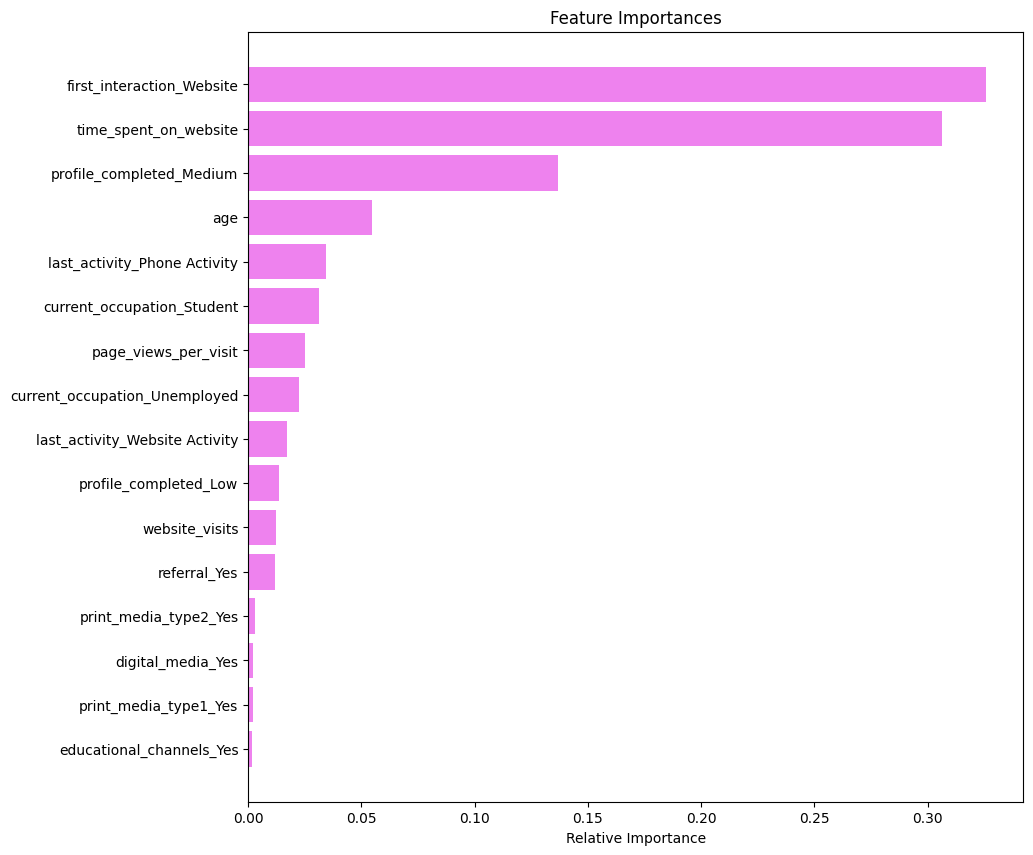

In [ ]:
# Importance of features in the tree building

print (pd.DataFrame(rf_tuned_estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))
# Plotting the feature importance
importances = rf_tuned_estimator.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

## Actionable Insights and Recommendations

The Random Forest further verifies the results from the decision tree that the most important features are time_spent_on_website, first_interaction_Website and profile_completed_Medium.
We can say that the people appear to enroll after spending a significant time on the compamy's website, which is needed to learn about the program and complete the profile. Since the website plays a big role in this decision making process, the suggestion here would be to make the website more interractive and ingaging.  
Age is also a key feature, probably this program offers some career enhancement value for people who already have job or looking to aquire new skills. So, it can be suggested to target a 40-60 years old age group.

